In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
features = pd.read_parquet('data_231130/consolidated_features.parquet')
features

,"g-r_mean_g,r","g-r_max_g,r",MHPS_ratio_g,MHPS_low_g,MHPS_high_g,MHPS_non_zero_g,MHPS_PN_flag_g,MHPS_ratio_r,MHPS_low_r,MHPS_high_r,...,last_brightness_before_band_r,max_brightness_before_band_r,median_brightness_before_band_r,n_forced_phot_band_after_r,max_brightness_after_band_r,median_brightness_after_band_r,Timespan_nan,Coordinate_x_nan,Coordinate_y_nan,Coordinate_z_nan
aid_ZTF17aaaaajz,3.606684,3.822370,30.711777,0.774220,0.025209,16.0,0.0,175.091080,6.968954,0.039802,...,NaN,NaN,NaN,30.0,14.045668,-21.270028,1112.001285,0.313545,0.544991,0.777608
aid_ZTF17aaaaauo,2.866425,3.132062,61.113964,0.756299,0.012375,91.0,0.0,415.129730,31.327026,0.075463,...,NaN,NaN,NaN,335.0,38.115958,-17.470143,1211.863932,0.512471,-0.383321,0.768400
aid_ZTF17aaaabte,0.400895,0.314832,6.490030,12.386256,1.908505,350.0,0.0,4.810787,13.221408,2.748284,...,NaN,NaN,NaN,8.0,23.676932,12.574368,1149.960250,0.735010,0.388589,0.555661
aid_ZTF17aaaactd,2.424023,2.139564,11.487591,332.585602,28.951729,55.0,0.0,3.714489,57.510006,15.482615,...,NaN,NaN,NaN,18.0,48.614857,-7.034458,941.691661,0.058632,0.998279,0.000834
aid_ZTF17aaaactj,0.429526,0.422517,2.815125,12.955008,4.601929,231.0,0.0,2.369968,41.278934,17.417503,...,-26.374397,-26.374397,-45.430750,106.0,86.391663,2.359485,1132.989627,0.649265,0.466368,0.600796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aid_ZTF23abjzkmx,0.939180,0.840564,0.217137,0.034860,0.160545,7.0,0.0,0.767170,0.090149,0.117509,...,4.083587,4.083587,4.052698,0.0,NaN,NaN,21.024105,-0.278722,0.893383,0.352394
aid_ZTF23abkornc,0.181267,0.090048,17.006556,0.249844,0.014691,7.0,0.0,1.808085,0.023721,0.013120,...,NaN,NaN,NaN,NaN,NaN,NaN,21.003061,-0.036328,0.929566,-0.366863
aid_ZTF23ablfxvj,NaN,NaN,0.233014,0.228837,0.982074,9.0,0.0,NaN,NaN,NaN,...,-2.313839,6.637050,4.268919,0.0,NaN,NaN,20.868528,0.733900,0.141125,0.664436
aid_ZTF23ablzckq,NaN,NaN,0.909190,0.517568,0.569262,7.0,0.0,1.356035,0.746958,0.550840,...,3.296000,3.296000,-1.752155,0.0,NaN,NaN,15.960040,0.666425,-0.743105,0.060599


## Period

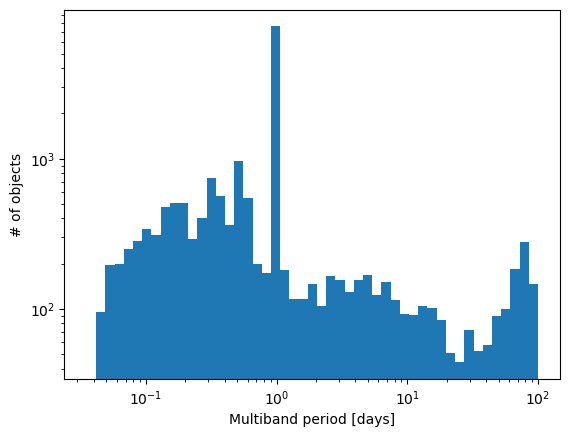

In [3]:
bins = 10**(np.linspace(-1.45, 2, 50))
plt.loglog()
plt.hist(features['Multiband_period_g,r'], bins=bins)
plt.xlabel('Multiband period [days]')
plt.ylabel('# of objects');

## Number of NaNs

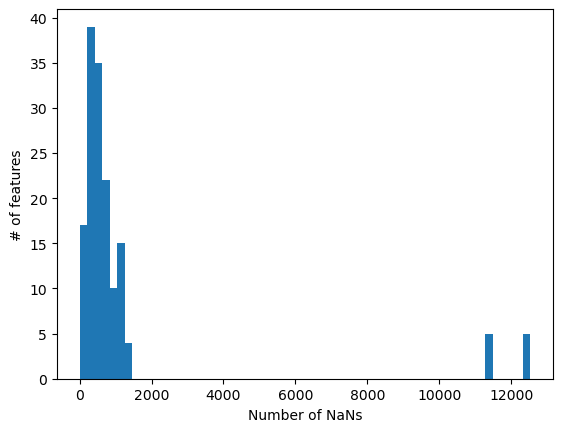

In [4]:
n_nans = features.isna().sum(axis=0).values
plt.hist(n_nans, bins=60)
plt.xlabel('Number of NaNs')
plt.ylabel('# of features');

## Labels

In [5]:
object_info = pd.read_parquet('data_231130/objects_231130.parquet')
object_info['aid'] = 'aid_' + object_info.index.values
object_info.set_index('aid', inplace=True)
object_info

,ra,dec,submitter,alerceclass
aid,,,,
aid_ZTF18aaadfyl,156.578799,18.586220,amunoz,RSCVn
aid_ZTF21aaiaqhh,193.878339,30.027998,amunoz,SNII
aid_ZTF21aapjqdl,206.288918,-10.600883,amunoz,SNIa
aid_ZTF18aalozvy,149.874570,21.389226,amunoz,Blazar
aid_ZTF18abcjabg,283.041552,-3.028178,amunoz,CEP
...,...,...,...,...
aid_ZTF23aaqniyk,266.581282,10.106150,amunoz,SNII
aid_ZTF19abpfljz,16.164184,38.590284,amunoz,QSO
aid_ZTF19aayepvi,243.831109,-25.670230,amunoz,YSO


In [6]:
# LPV are intentionally out
periodic_classes = [
    'EA',
    'EBEW',
    'Periodic-Other',
    'RSCVn',
    'CEP',
    'RRLab',
    'RRLc',
    'DSCT'
]
periodic_object_info = object_info[object_info['alerceclass'].isin(periodic_classes)]
periodic_object_info

,ra,dec,submitter,alerceclass
aid,,,,
aid_ZTF18aaadfyl,156.578799,18.586220,amunoz,RSCVn
aid_ZTF18abcjabg,283.041552,-3.028178,amunoz,CEP
aid_ZTF18abcpohw,239.281176,5.569561,amunoz,DSCT
aid_ZTF18abuszmh,306.489647,-24.716426,amunoz,Periodic-Other
aid_ZTF18aajbrjg,274.118123,56.591446,amunoz,EA
...,...,...,...,...
aid_ZTF21aamkwra,197.971483,-27.906962,amunoz,Periodic-Other
aid_ZTF18aabnoxk,136.087715,41.920203,amunoz,CEP
aid_ZTF18abmszjn,291.706583,4.985398,amunoz,EA


In [13]:
features_periodic = features.loc[periodic_object_info.index.intersection(features.index)]
features_periodic = features_periodic[['Multiband_period_g,r', 'Harmonics_chi_g', 'Harmonics_chi_r', 'PPE_g,r']]
features_periodic = pd.concat([features_periodic, periodic_object_info[['alerceclass']]], axis=1)
features_periodic.head()

,"Multiband_period_g,r",Harmonics_chi_g,Harmonics_chi_r,"PPE_g,r",alerceclass
aid_ZTF18aaadfyl,7.868790,0.000964,0.000633,0.067380,RSCVn
aid_ZTF18abcjabg,3.029060,0.000237,0.000057,0.055452,CEP
aid_ZTF18abcpohw,0.046354,0.000534,0.000283,0.047098,DSCT
aid_ZTF18abuszmh,0.681383,0.000029,0.000020,0.061487,Periodic-Other
aid_ZTF18aajbrjg,0.260661,0.001017,0.000934,0.015460,EA


In [14]:
features_periodic.sort_values('PPE_g,r')

,"Multiband_period_g,r",Harmonics_chi_g,Harmonics_chi_r,"PPE_g,r",alerceclass
aid_ZTF18abhxqst,0.160608,0.000021,0.000052,0.000101,DSCT
aid_ZTF18abfocjb,0.606408,0.000801,0.000457,0.000133,EA
aid_ZTF18abgdghs,0.211390,0.003778,0.000854,0.000187,RRLab
aid_ZTF18abeqxmz,0.236120,0.025149,0.006930,0.000227,EA
aid_ZTF21aakigdk,0.099775,0.000270,0.000188,0.000231,Periodic-Other
...,...,...,...,...,...
aid_ZTF18acvpqkw,NaN,NaN,NaN,NaN,DSCT
aid_ZTF21acdilhq,NaN,NaN,NaN,NaN,DSCT
aid_ZTF18adkfpoy,NaN,NaN,NaN,NaN,DSCT
aid_ZTF18abbkped,NaN,NaN,NaN,NaN,CEP


In [12]:
features_periodic.isna().mean(axis=0)

Multiband_period_g,r    0.000569
Harmonics_chi_g         0.005009
Harmonics_chi_r         0.038019
PPE_g,r                 0.000569
dtype: float64

In [15]:
features_periodic.groupby('alerceclass').apply(lambda df: df['Multiband_period_g,r'].describe())

"Multiband_period_g,r",count,mean,std,min,25%,50%,75%,max
alerceclass,,,,,,,,
CEP,1092.0,7.661624,11.156524,0.052047,1.746839,3.469303,8.790224,90.521840
DSCT,1094.0,0.117595,0.492489,0.045420,0.067119,0.084385,0.107183,15.950502
EA,1099.0,0.901587,2.903950,0.045426,0.304509,0.516085,0.959239,89.177341
EBEW,1102.0,0.258608,0.671948,0.045456,0.141547,0.165926,0.201599,12.980681
Periodic-Other,1092.0,0.999787,3.773088,0.045213,0.148284,0.200713,0.370279,44.126165
RRLab,1101.0,0.580236,0.394088,0.053626,0.493000,0.550579,0.604955,9.390131
RRLc,1099.0,0.335730,0.112597,0.097646,0.299232,0.329016,0.357807,3.490309
RSCVn,1101.0,7.936419,13.505625,0.045080,0.998047,3.510262,8.225734,95.239355


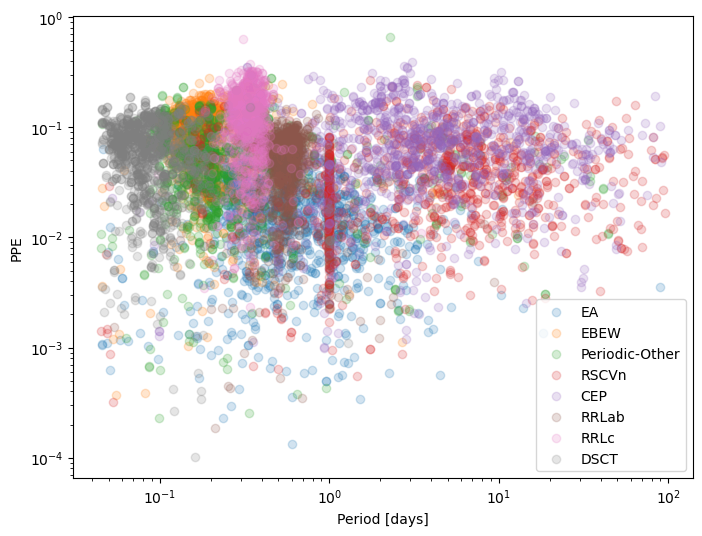

In [42]:
plt.figure(figsize=(8, 6))
for alerceclass in periodic_classes:
    features_from_class = features_periodic[features_periodic['alerceclass'] == alerceclass]
    plt.scatter(
        features_from_class['Multiband_period_g,r'],
        features_from_class['PPE_g,r'],
        alpha=0.2,
        label=alerceclass
    )
plt.legend()
plt.xlabel('Period [days]')
plt.ylabel('PPE')
plt.loglog();

[]

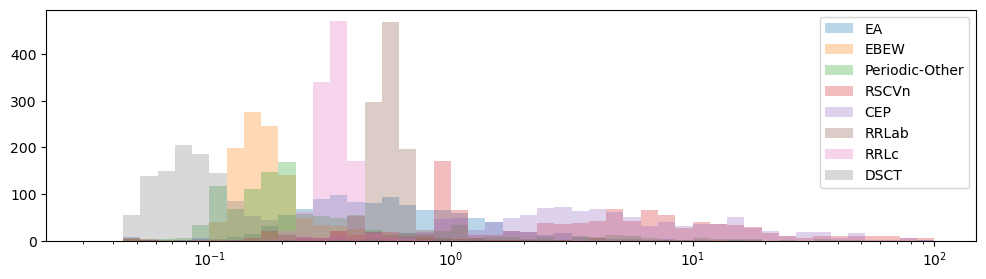

In [28]:
plt.figure(figsize=(12, 3))
for alerceclass in periodic_classes:
    features_from_class = features_periodic[features_periodic['alerceclass'] == alerceclass]
    plt.hist(
        features_from_class['Multiband_period_g,r'], 
        bins=10**(np.linspace(-1.5, 2, 50)), 
        alpha=0.3,
        label=alerceclass
    );
plt.legend()
plt.semilogx()

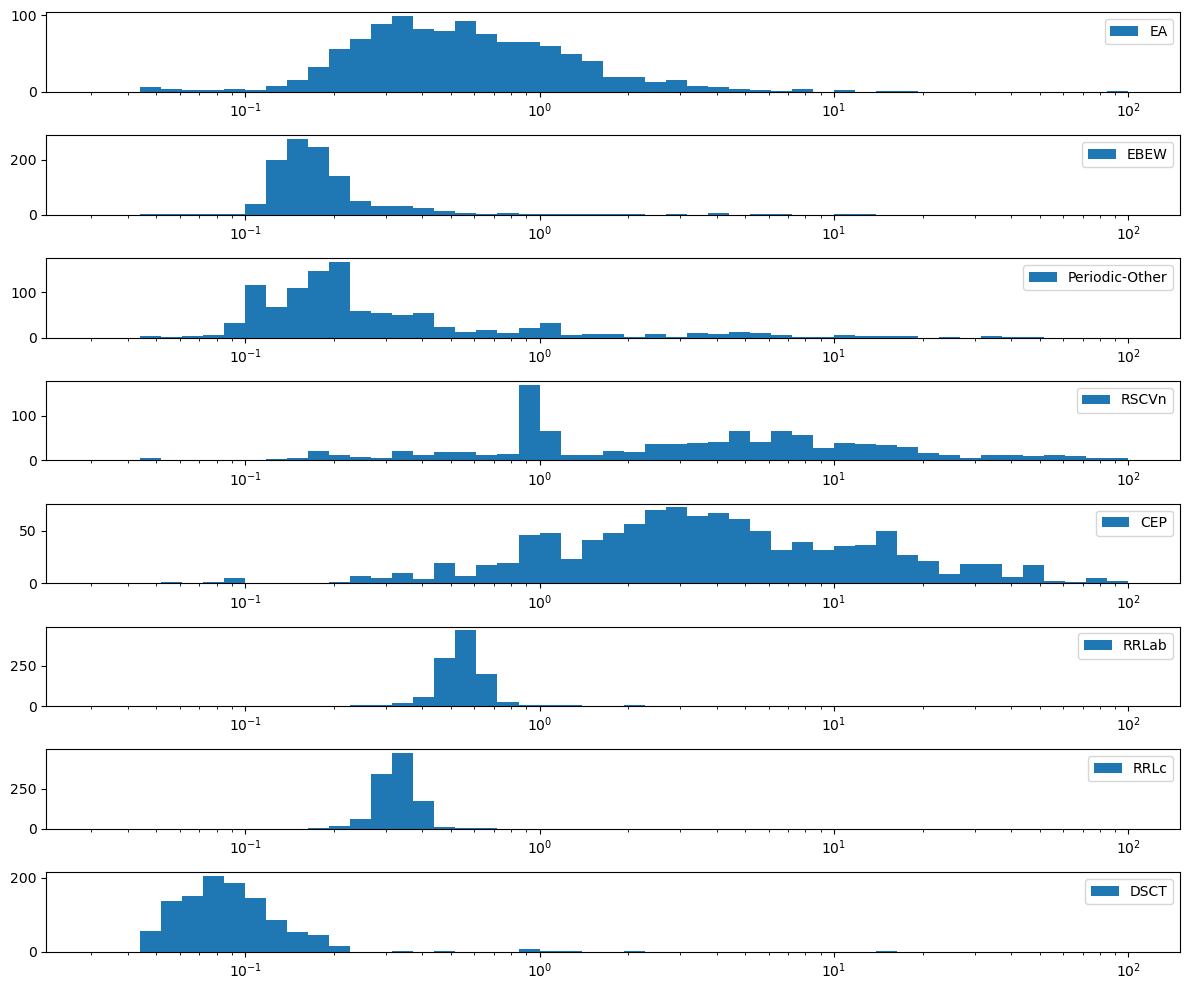

In [33]:
plt.figure(figsize=(12, 10))
for i, alerceclass in enumerate(periodic_classes):
    features_from_class = features_periodic[features_periodic['alerceclass'] == alerceclass]
    plt.subplot(len(periodic_classes), 1, i+1)
    plt.hist(
        features_from_class['Multiband_period_g,r'], 
        bins=10**(np.linspace(-1.5, 2, 50)), 
        label=alerceclass
    );
    plt.legend()
    plt.semilogx()
plt.tight_layout()